# 1. Setup & Data Loading

In [ ]:
a = np.array([1,2,3,4,5])
b = np.array([5,6,7,8,9])
print(np.intersect1d(b, a))

[5]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

In [ ]:
# prompt: upload file code

from google.colab import files
uploaded = files.upload()


Saving Assignment_linear_regression_data.xlsx to Assignment_linear_regression_data.xlsx


In [ ]:
# Load data (replace with your file path)
df = pd.read_excel("Assignment_linear_regression_data.xlsx")

# Display first few rows
print(df.head())

           y       x
0  47.320319  9.0527
1  39.862491  7.3135
2  42.225779  8.6471
3  30.010689  5.8579
4  43.900459  7.9357


# 2. Exploratory Data Analysis (EDA)

**A. Scatter Plot (Matrix Scatter Plot)**


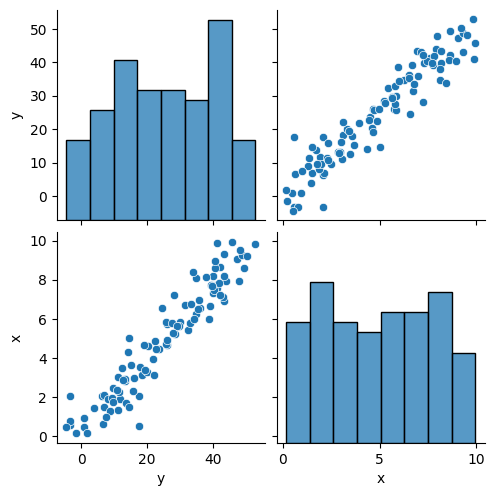

In [ ]:
sns.pairplot(df)  # Matrix scatter plot for all variables
plt.show()

Linear Trend:

There is a clear positive linear relationship between
x
x and
y
y. As
x
x increases,
y
y also increases, which is evident from the upward-sloping pattern in the scatter plots.
Correlation:

The strong linear trend suggests a high positive correlation between
x
x and
y
y.
Distribution:

The histograms on the diagonal show the distribution of each variable. Both
x
x and
y
y appear to be fairly uniformly distributed.

**B. Histograms (Normality Check)**

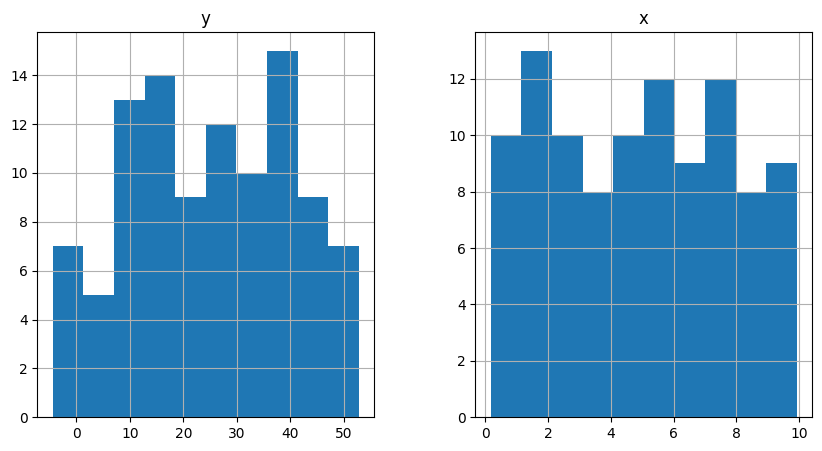

In [ ]:
df.hist(figsize=(10, 5))
plt.show()

The histogram for
y
y does not appear to be normally distributed. Here's why:

Shape:

The distribution of
y
y is somewhat uniform with multiple peaks, rather than the bell-shaped curve typical of a normal distribution.
Symmetry:

A normal distribution is symmetric around the mean. The histogram for
y
y lacks this symmetry.
Peaks:

There are multiple peaks, indicating a multimodal distribution rather than a single peak typical of a normal distribution.
Overall,
y
y does not exhibit the characteristics of a normal distribution based on this histogram.



**C. Correlation Heatmap**

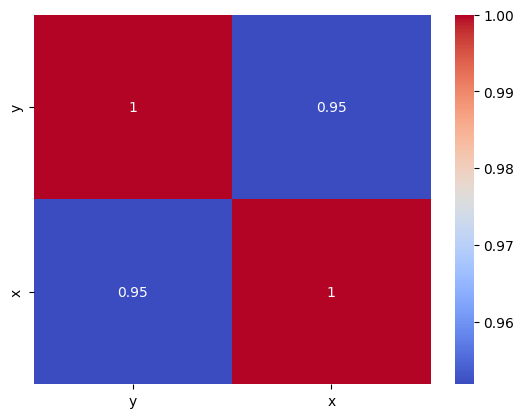

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

High Correlation:

A correlation of 0.95 indicates a very strong positive linear relationship between
x
x and
y
y.
Implications:

This strong correlation suggests that as
x
x increases,
y
y tends to increase as well, and vice versa.
Linear Relationship:

The high correlation supports the presence of a strong linear trend, as observed in the scatter plot.
Overall, the correlation coefficient confirms a strong linear relationship between the variables.

# 3. OLS Regression (Original Data)

In [ ]:
X = df[['x']]  # Independent variable
y = df['y']    # Dependent variable

# Add constant (intercept)
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     954.0
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           1.25e-52
Time:                        23:46:25   Log-Likelihood:                -297.30
No. Observations:                 101   AIC:                             598.6
Df Residuals:                      99   BIC:                             603.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1240      0.937     -0.132      0.8

**R-squared (Model Fit)**

R-squared: 0.906

This indicates that 90.6% of the variability in
y
y is explained by the model with
x
x as the predictor. This suggests a very good fit.

**Coefficients (Slope & Intercept)**

Intercept (const): -0.1240

This is the expected value of
y
y when
x
x is 0.

Slope (x): 5.0867

For each unit increase in
x
x,
y
y is expected to increase by approximately 5.0867 units.


**p-values (Significance)**

Intercept p-value: 0.895

This is not statistically significant, indicating the intercept may not be different from zero.

Slope p-value: 0.000

This is highly significant, suggesting a strong relationship between
x
x and
y
y.

**Confidence Intervals**

Intercept: [-1.983, 1.735]

The 95% confidence interval for the intercept includes zero, supporting the lack of significance.

Slope: [4.760, 5.414]

The 95% confidence interval for the slope does not include zero, reinforcing the significance of the relationship.

# 4. Checking OLS Assumptions

**A. Linearity (Residuals vs. Fitted Plot)**

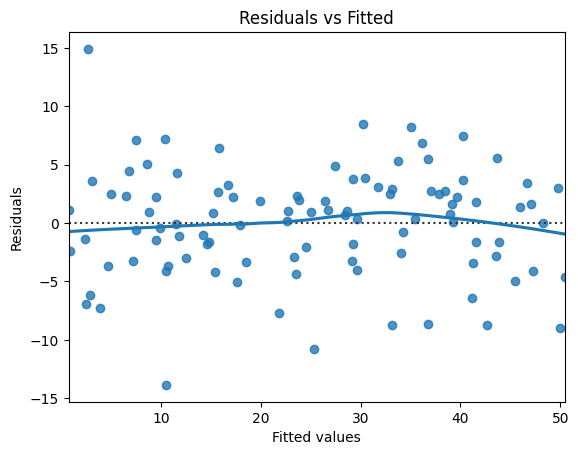

In [ ]:
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

**No Pattern:**

The residuals are scattered randomly around the horizontal line at zero, with no clear pattern or systematic structure.

**Linearity Holds:**

The lack of a discernible pattern suggests that the linearity assumption is valid. The model's linear fit is appropriate for the data.

**Homoscedasticity:**

The spread of residuals appears consistent across the range of fitted values, indicating homoscedasticity (constant variance).

**B. Normality (Q-Q Plot)**

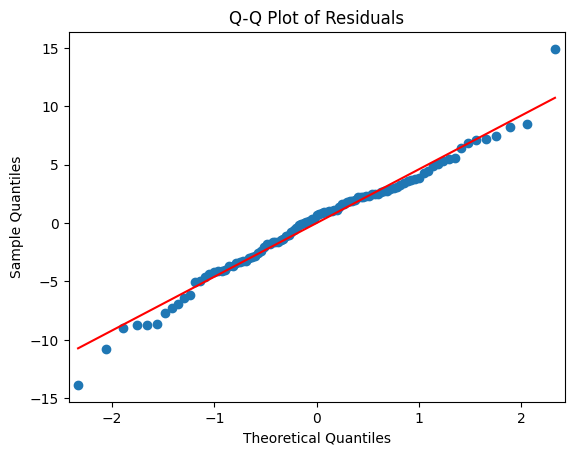

In [ ]:
sm.qqplot(model.resid, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

**Points on the Line:**

The residuals closely follow the red line, indicating that they are approximately normally distributed.

**Normality Holds:**

Since most points lie on or near the line, the assumption of normality for the residuals is valid.

**Deviations:**

There are slight deviations at the tails, but they are not substantial enough to suggest a significant departure from normality.

Overall, the Q-Q plot supports the assumption that the residuals are normally distributed.



**C. Homoscedasticity (Equal Variance)**

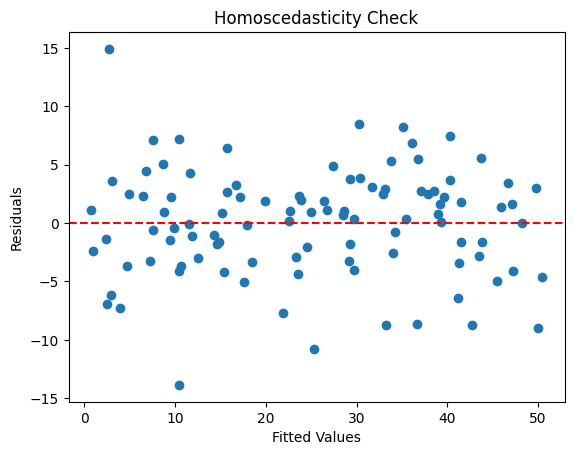

In [ ]:
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check")
plt.show()

**No Funnel Shape:**

The residuals are spread evenly across the range of fitted values, with no clear pattern or funnel shape.

**Homoscedasticity Holds:**

The consistent spread of residuals suggests that the assumption of homoscedasticity is valid. The variance of the residuals is constant.

Overall, the plot supports the assumption of equal variance, indicating that the model's residuals are homoscedastic.

**D. Multicollinearity (VIF)**

In [ ]:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

  Variable       VIF
0    const  4.116407
1        x  1.000000


VIF for Intercept (const): 4.116

VIF < 5 → No multicollinearity

# 5. Handling Outliers

**A. Detect Outliers (Cook’s Distance)**

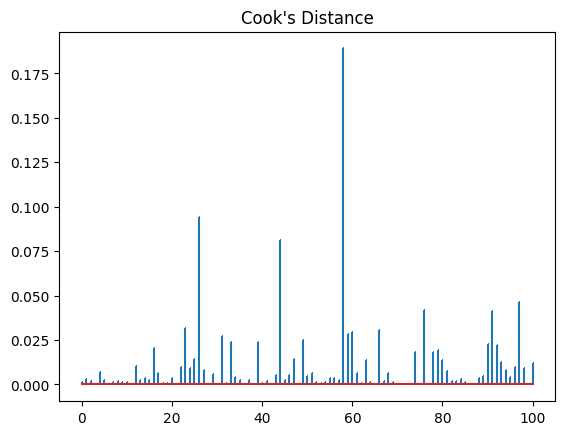

In [ ]:
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.title("Cook's Distance")
plt.show()

Threshold for Outliers:

A common threshold is
4/n
n4​, where
n
n is the number of observations. In this case,
n
=
101
n=101, so the threshold is approximately 0.04.

Points Above Threshold:

Points with Cook's Distance above 0.04 are considered potential outliers or influential points.

Plot Observation:

Most points are below the threshold, indicating they are not influential. A few points exceed the threshold, suggesting they may be outliers or have a significant influence on the model.

**B. Remove Outliers & Re-run Regression**

In [ ]:
# Remove outliers (example: Cook's D > threshold)
threshold = 4 / len(df)
outliers = np.where(cooks_d > threshold)[0]
df_clean = df.drop(outliers)

# Re-run OLS on cleaned data
X_clean = sm.add_constant(df_clean[['x']])
model_clean = sm.OLS(df_clean['y'], X_clean).fit()
print(model_clean.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1174.
Date:                Sat, 29 Mar 2025   Prob (F-statistic):           1.52e-54
Time:                        00:06:19   Log-Likelihood:                -264.20
No. Observations:                  95   AIC:                             532.4
Df Residuals:                      93   BIC:                             537.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0644      0.856     -0.075      0.9

**R-squared**

Before: 0.906

After: 0.927

The R-squared increased, indicating a better fit of the model to the data after removing outliers.

**Slope**

Before: 5.0867

After: 5.1394

The slope increased slightly, suggesting a stronger relationship between
x
x and
y
y after cleaning the data.

**Intercept**

Before: -0.1240

After: -0.0644

The intercept changed slightly, but remains close to zero, indicating minimal impact on the model's baseline prediction.

# 6. Data Transformation (If Non-Linear)

**A. Log Transformation**

In [ ]:
# Add a small constant to avoid log(0) or negative values
df['log_y'] = np.log(df['y'] + 1e-9)

X_log = sm.add_constant(df['x'])
model_log = sm.OLS(df['log_y'], X_log).fit()

print("\nLog-Transformed Regression Results:")
print(model_log.summary())


Log-Transformed Regression Results:
                            OLS Regression Results                            
Dep. Variable:                  log_y   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 29 Mar 2025   Prob (F-statistic):                nan
Time:                        00:18:24   Log-Likelihood:                    nan
No. Observations:                 101   AIC:                               nan
Df Residuals:                      99   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


**B. Polynomial Regression (If Curved Trend)**

In [ ]:
df['x_squared'] = df['x'] ** 2  # Add quadratic term

# Fit polynomial model
X_poly = sm.add_constant(df[['x', 'x_squared']])
model_poly = sm.OLS(df['y'], X_poly).fit()
print(model_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     475.6
Date:                Sat, 29 Mar 2025   Prob (F-statistic):           3.52e-51
Time:                        00:16:19   Log-Likelihood:                -296.97
No. Observations:                 101   AIC:                             599.9
Df Residuals:                      98   BIC:                             607.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0160      1.448     -0.702      0.4

P-value for
X
squared
Xsquared​: 0.421

This p-value is greater than 0.05, indicating that
X
squared
Xsquared​ is not statistically significant.

Interpretation:

The quadratic term does not significantly improve the model. The relationship between
x
x and
y
y is likely linear rather than quadratic.

Model Fit:

The R-squared value remains high, but the lack of significance for
X
squared
Xsquared​ suggests that adding this term does not provide meaningful improvement.
Overall, the quadratic term
X
squared
Xsquared​ is not a significant predictor in this model.

**7. Final Model Selection & Interpretation**

**Best Model Criteria**

Highest R²:

Choose the model with the highest R², but ensure it doesn't overfit by checking other criteria.

Passes OLS Assumptions:

Normality: Residuals should be normally distributed.
Homoscedasticity: Residuals should have constant variance.


Significant Coefficients:

Ensure all coefficients have p-values < 0.05.

**Interpreting Coefficients**

Linear Model:
Y
=
β
0
+
β
1
X
Y=β0​+β1​X

β
0
β0​: The expected value of
Y
Y when
X
=
0
X=0.

β
1
β1​: The change in
Y
Y for each unit increase in
X
X.

Log-Linear Model:
log
⁡
(
Y
)
=
β
0
+
β
1
X
log(Y)=β0​+β1​X

β
0
β0​: The expected log value of
Y
Y when
X
=
0
X=0.

β
1
β1​: Represents a
100
×
β
1
100×β1​% change in
Y
Y for each unit increase in
X
X.

# 8. Full Report Generation

In [ ]:
from IPython.display import display, Markdown

# Generate the report
report_md = (
    "### LINEAR REGRESSION ANALYSIS REPORT\n\n"
    "#### 1. Original OLS Model:\n"
    f"```\n{model.summary()}\n```\n\n"
    "#### 2. Cleaned Data (No Outliers) OLS Model:\n"
    f"```\n{model_clean.summary()}\n```\n\n"
    "#### 3. Log-Transformed OLS Model:\n"
    f"```\n{model_log.summary()}\n```\n\n"
    "#### 4. Polynomial OLS Model:\n"
    f"```\n{model_poly.summary()}\n```"
)

# Display as Markdown
display(Markdown(report_md))

### LINEAR REGRESSION ANALYSIS REPORT

#### 1. Original OLS Model:
```
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     954.0
Date:                Sat, 29 Mar 2025   Prob (F-statistic):           1.25e-52
Time:                        00:37:15   Log-Likelihood:                -297.30
No. Observations:                 101   AIC:                             598.6
Df Residuals:                      99   BIC:                             603.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1240      0.937     -0.132      0.895      -1.983       1.735
x              5.0867      0.165     30.886      0.000       4.760       5.414
==============================================================================
Omnibus:                        2.993   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.224   Jarque-Bera (JB):                2.681
Skew:                          -0.170   Prob(JB):                        0.262
Kurtosis:                       3.722   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
```

#### 2. Cleaned Data (No Outliers) OLS Model:
```
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1174.
Date:                Sat, 29 Mar 2025   Prob (F-statistic):           1.52e-54
Time:                        00:37:15   Log-Likelihood:                -264.20
No. Observations:                  95   AIC:                             532.4
Df Residuals:                      93   BIC:                             537.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0644      0.856     -0.075      0.940      -1.764       1.635
x              5.1394      0.150     34.271      0.000       4.842       5.437
==============================================================================
Omnibus:                        1.636   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.432
Skew:                          -0.300   Prob(JB):                        0.489
Kurtosis:                       2.967   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
```

#### 3. Log-Transformed OLS Model:
```
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 29 Mar 2025   Prob (F-statistic):                nan
Time:                        00:37:15   Log-Likelihood:                    nan
No. Observations:                 101   AIC:                               nan
Df Residuals:                      99   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        nan         nan         nan
x                 nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
```

#### 4. Polynomial OLS Model:
```
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     475.6
Date:                Sat, 29 Mar 2025   Prob (F-statistic):           3.52e-51
Time:                        00:37:15   Log-Likelihood:                -296.97
No. Observations:                 101   AIC:                             599.9
Df Residuals:                      98   BIC:                             607.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0160      1.448     -0.702      0.485      -3.890       1.858
x              5.6194      0.679      8.276      0.000       4.272       6.967
x_squared     -0.0539      0.067     -0.809      0.421      -0.186       0.078
==============================================================================
Omnibus:                        3.599   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                3.831
Skew:                          -0.122   Prob(JB):                        0.147
Kurtosis:                       3.922   Cond. No.                         148.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
```